In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['agg.path.chunksize'] = 10000

In [2]:
def plot_hist(array,bin_num):
    weights = np.ones_like(array)/len(array)
    n, bins, patches = plt.hist(array,bins=bin_num,weights=weights)
    plt.close()
    return bins, n

In [5]:
def make_graphs(file_str, nbins, title_str = None, save_str = 'images/null'):
    array = np.load(file_str)
    print(array.shape)
    bins, n = plot_hist([row[1] for row in array],nbins)

    step = 0.5*(bins[1]-bins[0])

    plt.figure(figsize=(20,10))
    plt.plot(bins[:-1]+step, n)
    plt.xlabel('Distance (arcminutes)')
    plt.ylabel('Frequency')
    plt.title(title_str)
    plt.savefig(save_str)

(268321, 7)


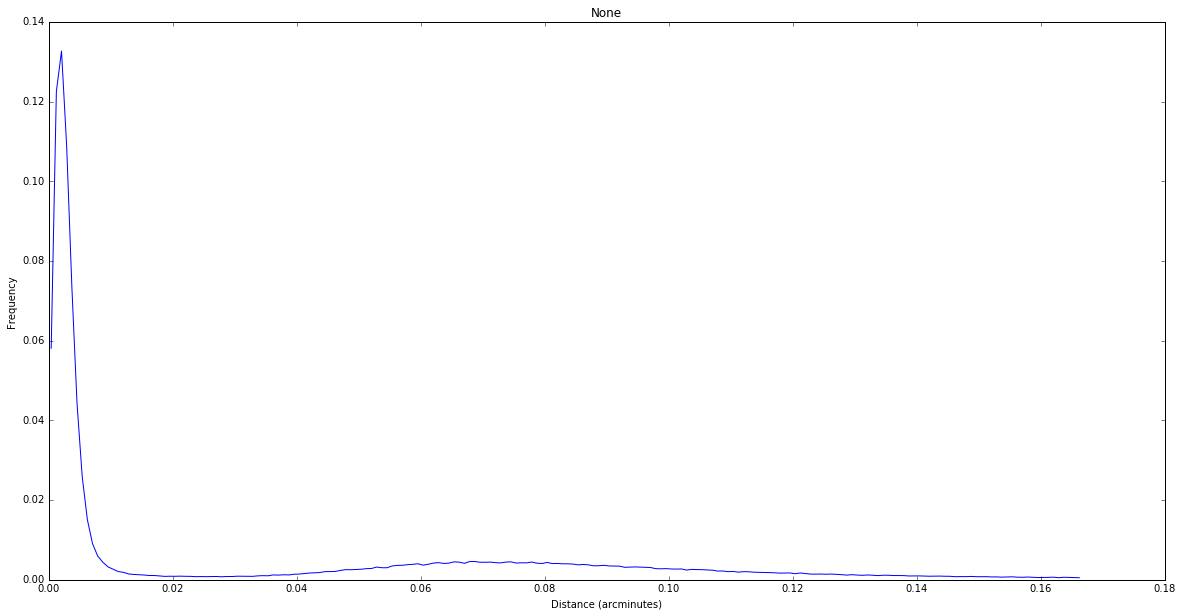

In [7]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/xmatch_sdss.npy',200)

(56844, 7)


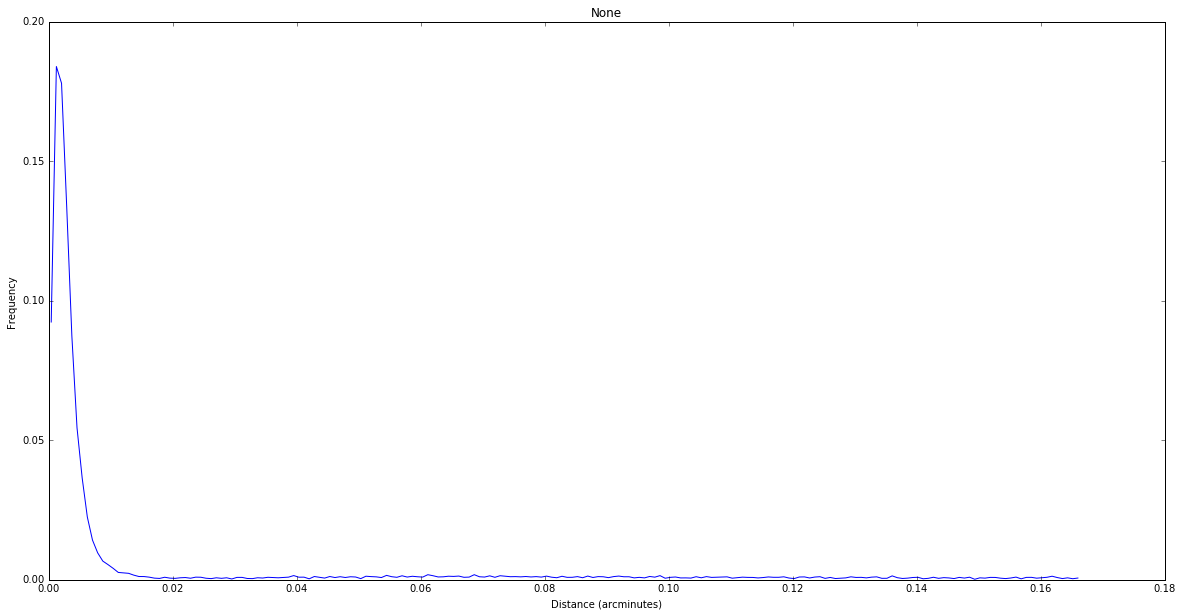

In [10]:
make_graphs('/home/calum/Documents/Mphys_data/mgs_multiwavelength/new_xmatch_sdss.npy',200)